<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/13_Self_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Attention Demonstration
This program illustrates the fundamental workings of a Self-Attention mechanism. It represents each word in a sentence as a vector (embedding) and computes how much attention each word pays to every other word in the sequence.
This example helps to grasp the core idea of Self-Attention, which forms the foundation of modern architectures like Transformers. If needed, this demonstration can be expanded for deeper insights or practical applications.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Simple Self-Attention Mechanism
class SimpleSelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super(SimpleSelfAttention, self).__init__()
        self.query_layer = nn.Linear(embed_dim, embed_dim)
        self.key_layer = nn.Linear(embed_dim, embed_dim)
        self.value_layer = nn.Linear(embed_dim, embed_dim)

    def forward(self, inputs):
        # Create query, key, and value
        query = self.query_layer(inputs)
        key = self.key_layer(inputs)
        value = self.value_layer(inputs)

        # Compute attention scores
        scores = torch.matmul(query, key.transpose(-2, -1)) / np.sqrt(query.size(-1))
        attention_weights = torch.softmax(scores, dim=-1)

        # Compute weighted value
        attention_output = torch.matmul(attention_weights, value)

        return attention_output, attention_weights

In [ ]:
# Example sentence: Represented as word embeddings
sentence = ["I", "like", "to", "play", "football"]
word_embeddings = {
    "I": [1, 0, 0, 0],
    "like": [0, 1, 0, 0],
    "to": [0, 0, 1, 0],
    "play": [0, 0, 0, 1],
    "football": [1, 1, 0, 0],
}

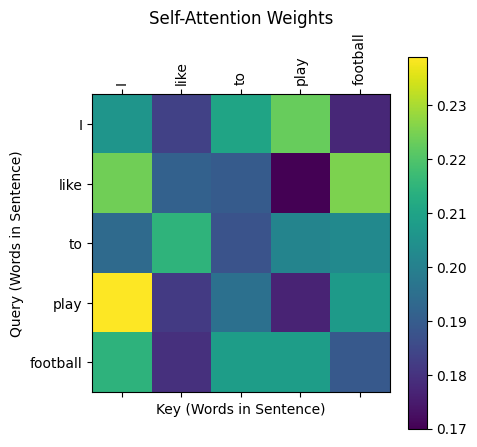

Sentence: ['I', 'like', 'to', 'play', 'football']
Attention Weights:
 [[0.20596042 0.18333799 0.21033946 0.2228957  0.17746648]
 [0.22393434 0.19125988 0.18969913 0.16986188 0.22524484]
 [0.19381468 0.21490894 0.1876583  0.20102814 0.20258991]
 [0.23894678 0.18151623 0.19538401 0.17672585 0.20742711]
 [0.21449524 0.17949696 0.20834768 0.20842245 0.1892376 ]]
Attention Output:
 [[ 0.8670106   0.1134541   0.445338   -0.34240624]
 [ 0.8853923   0.07503021  0.48704296 -0.3689816 ]
 [ 0.8750435   0.09168479  0.48134834 -0.36371833]
 [ 0.87935364  0.08334839  0.47288752 -0.35875684]
 [ 0.87188876  0.10466828  0.45233697 -0.34713197]]


In [ ]:
# Convert sentence to embedding tensor
inputs = torch.tensor([word_embeddings[word] for word in sentence], dtype=torch.float32).unsqueeze(0)

# Initialize the Self-Attention layer
embed_dim = 4
self_attention = SimpleSelfAttention(embed_dim)

# Forward pass
attention_output, attention_weights = self_attention(inputs)

# Visualize the attention weights
plt.matshow(attention_weights[0].detach().numpy(), cmap='viridis')
plt.colorbar()
plt.title("Self-Attention Weights")
plt.xlabel("Key (Words in Sentence)")
plt.ylabel("Query (Words in Sentence)")
plt.xticks(ticks=range(len(sentence)), labels=sentence, rotation=90)
plt.yticks(ticks=range(len(sentence)), labels=sentence)
plt.show()

# Print outputs
print("Sentence:", sentence)
print("Attention Weights:\n", attention_weights.squeeze().detach().numpy())
print("Attention Output:\n", attention_output.squeeze().detach().numpy())
